In [2]:
import numpy as np
import imgaug as ia
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import matplotlib.patches as patches

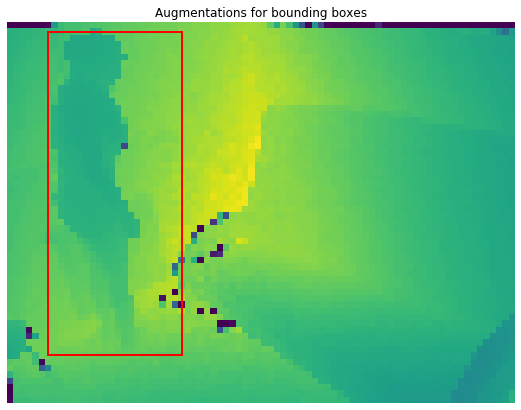

In [3]:
image = np.load('/home/mathurin/prudence/fusion/Serie27/Array/thermal_depth17.npy')
mean = np.mean(image, axis=(0,1))
std = np.std(image, axis=(0,1))

# Standardization
image = (image-mean)/std
image = image.astype('float32')
depth_image = image[:, :, 0]
thermal_image = image[:, :, 1]

bbox = (6,1,22,57)
w = bbox[2] - bbox[1]
h = bbox[3] - bbox[0]

bbs = BoundingBox(6,1,22,57)



image_stack = [depth_image, thermal_image]

# Create a Rectangle patch
rect = patches.Rectangle((bbox[0],bbox[1]),w,h,linewidth=2,edgecolor='r',facecolor='none')

fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(depth_image)
ax.add_patch(rect)



In [4]:
# initialize the augmenters for demo
rotate = iaa.Affine(rotate=(-25, 25)) # rotate image
gaussian_noise = iaa.AdditiveGaussianNoise(scale=0.1*np.max(depth_image)) # add gaussian noise
crop = iaa.Crop(percent=(0, 0.4)) # crop image
#hue = iaa.AddToHueAndSaturation((-60, 60))  # change their color
#elastic_trans = iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
#coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero

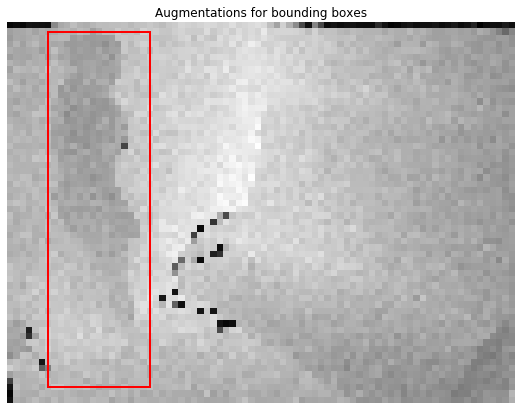

In [92]:
augmenters = [
              iaa.AdditiveGaussianNoise(scale=0.1*np.max(depth_image)),
              #iaa.ElasticTransformation(alpha=(0, 20.0), sigma=(4.0, 6.0)),
              #iaa.Dropout(p=(0.0, 0.1))
             ]
#seq = iaa.SomeOf((0, 2), augmenters, random_order=True)

seq = iaa.OneOf(augmenters)         
image_aug, bbs_aug = seq(image = depth_image, bounding_boxes=bbs)
bbs_aug_clipped = bbs_aug.clip_out_of_image(image_aug)


rect = patches.Rectangle((bbs_aug_clipped.x1,bbs_aug_clipped.y1), bbs_aug_clipped.x2-bbs_aug_clipped.x1, bbs_aug_clipped.y2-bbs_aug_clipped.y1,linewidth=2,edgecolor='r',facecolor='none')
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(image_aug, cmap='gray')
ax.add_patch(rect)
    

## Crop and rotate

OneOf(name=UnnamedOneOf, n=1, random_order=False, augmenters=[Crop(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.20000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False), Affine(name=UnnamedAffine, parameters=[Deterministic(float 1.00000000), Deterministic(int 0), Uniform(Deterministic(int -25), Deterministic(int 25)), Deterministic(float 0.00000000), Deterministic(int 1), Deterministic(int 0), Deterministic(constant), auto, False], deterministic=False)], deterministic=False)
OneOf(name=UnnamedOneOf, n=1, random_order=False, augmenters=[Crop(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.20000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False), Affine(name=UnnamedAffine, parameters=[Deterministic(float 1.00000000), Deterministic(int 0), Uniform(Deterministic(int -25), Deterministic(int 25)), Deterministic(float 0.000000

/home/mathurin/.conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


OneOf(name=UnnamedOneOf, n=1, random_order=False, augmenters=[Crop(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.20000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False), Affine(name=UnnamedAffine, parameters=[Deterministic(float 1.00000000), Deterministic(int 0), Uniform(Deterministic(int -25), Deterministic(int 25)), Deterministic(float 0.00000000), Deterministic(int 1), Deterministic(int 0), Deterministic(constant), auto, False], deterministic=False)], deterministic=False)
OneOf(name=UnnamedOneOf, n=1, random_order=False, augmenters=[Crop(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.20000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False), Affine(name=UnnamedAffine, parameters=[Deterministic(float 1.00000000), Deterministic(int 0), Uniform(Deterministic(int -25), Deterministic(int 25)), Deterministic(float 0.000000

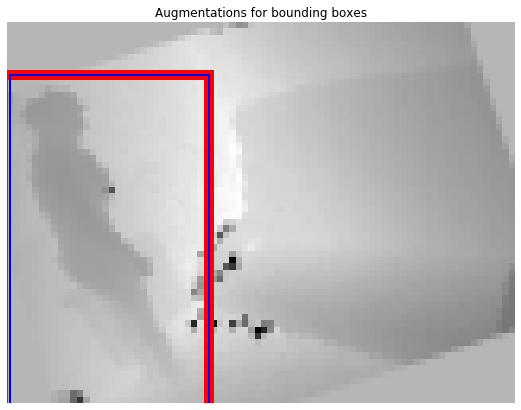

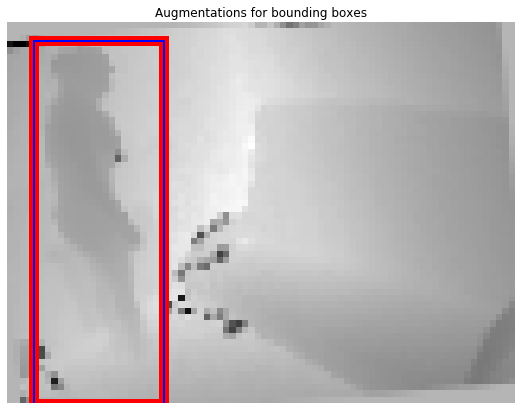

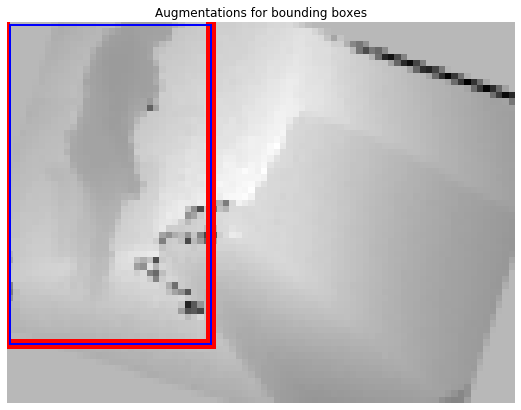

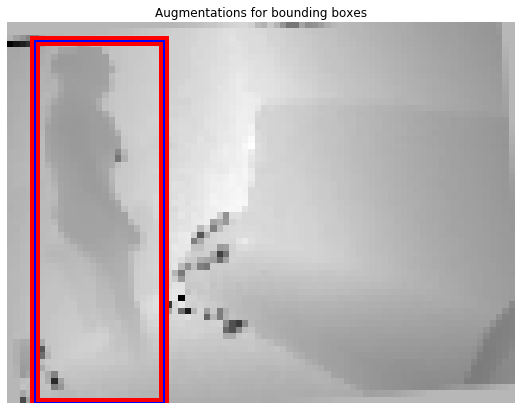

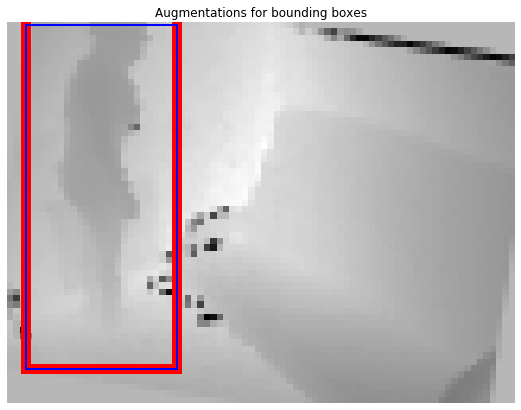

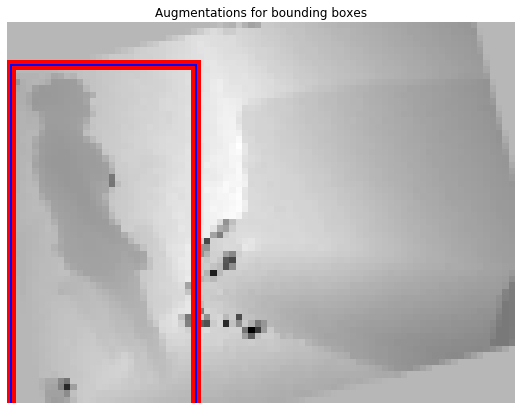

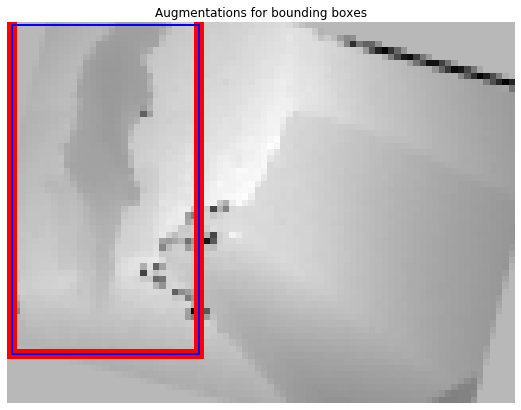

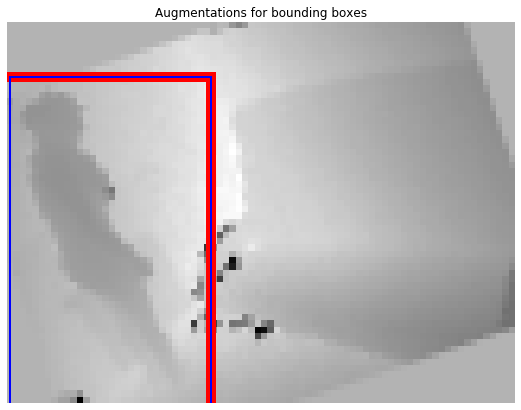

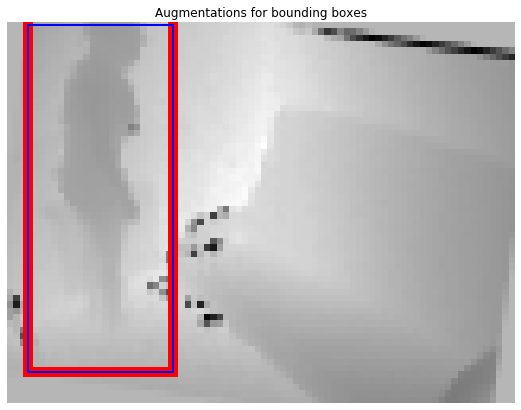

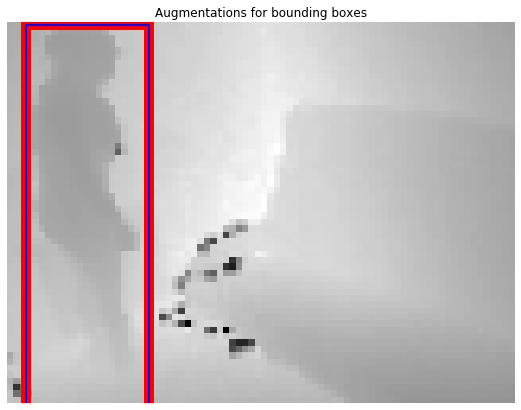

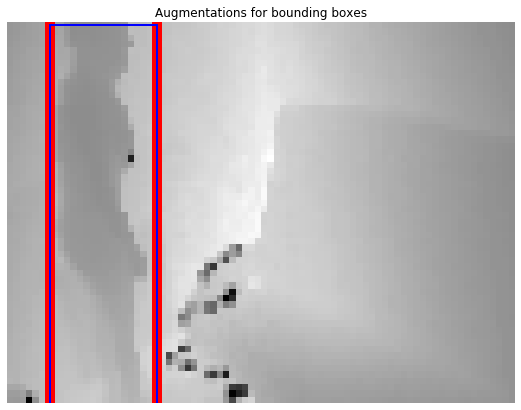

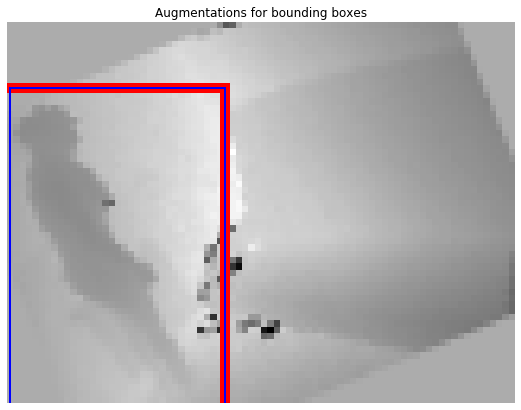

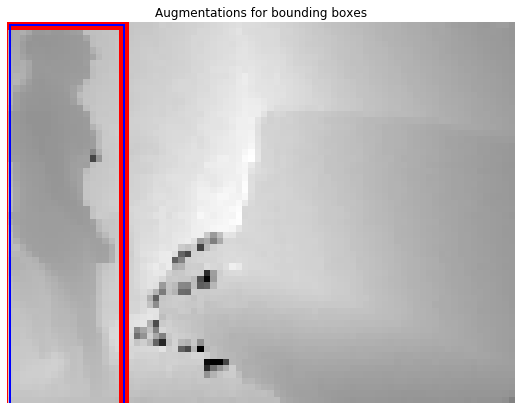

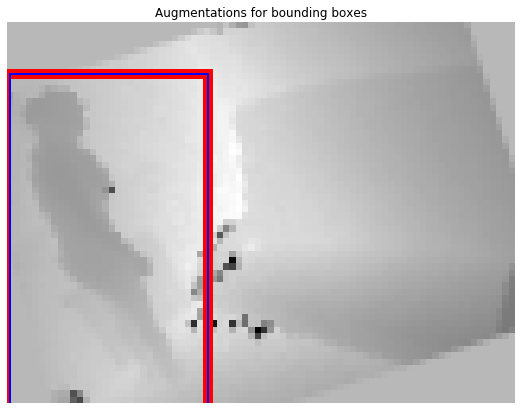

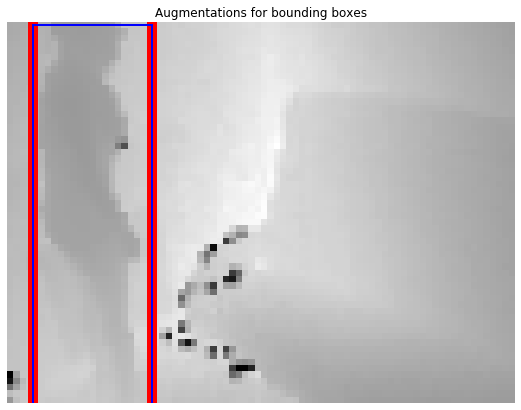

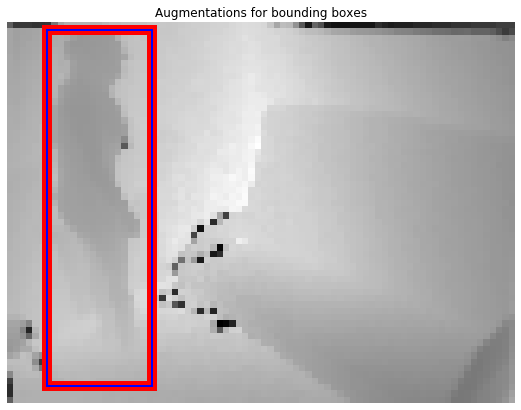

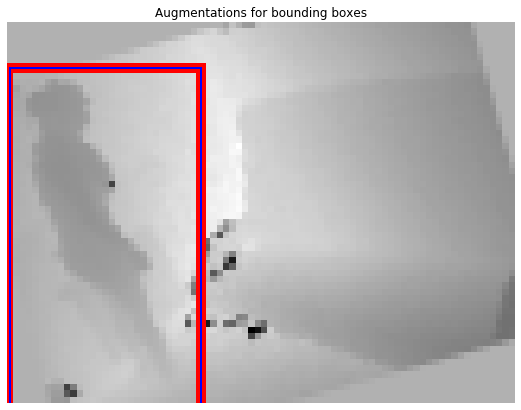

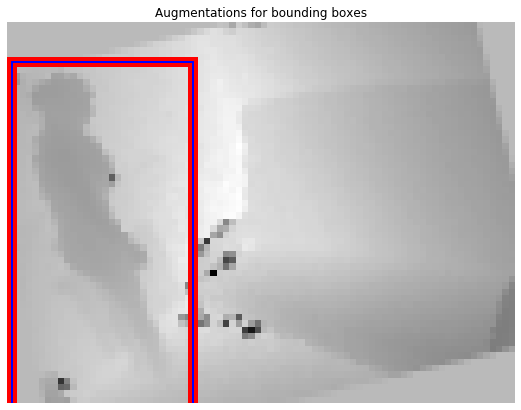

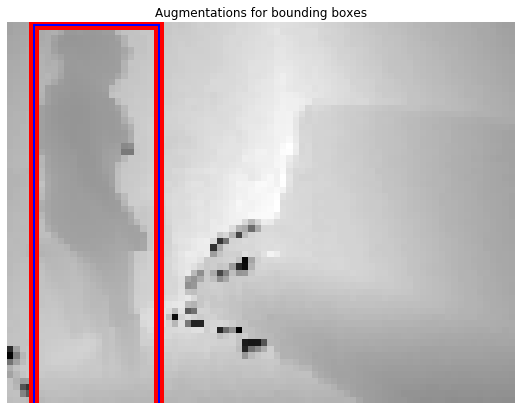

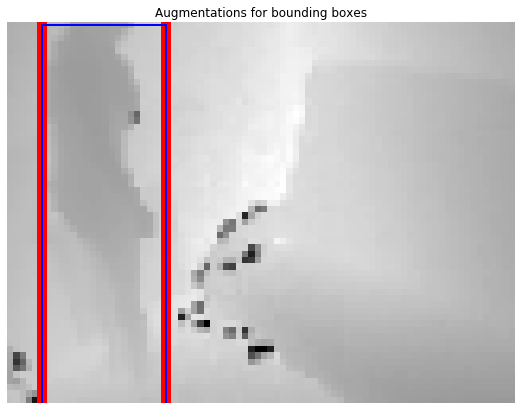

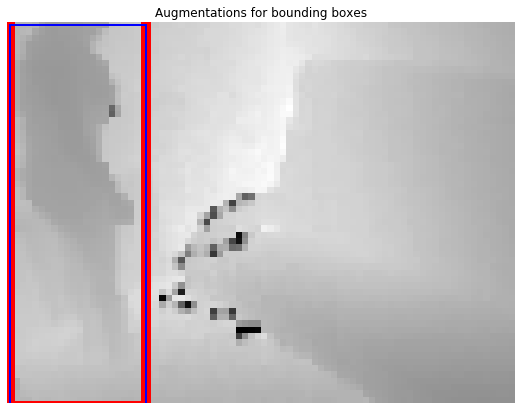

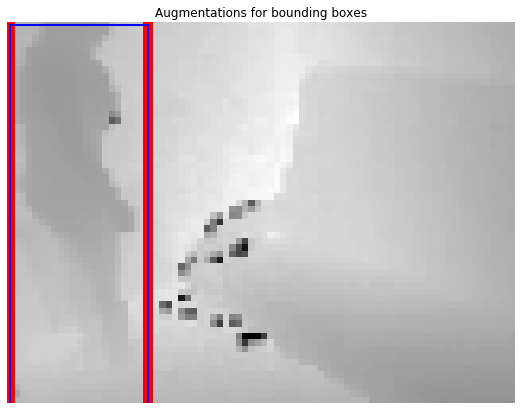

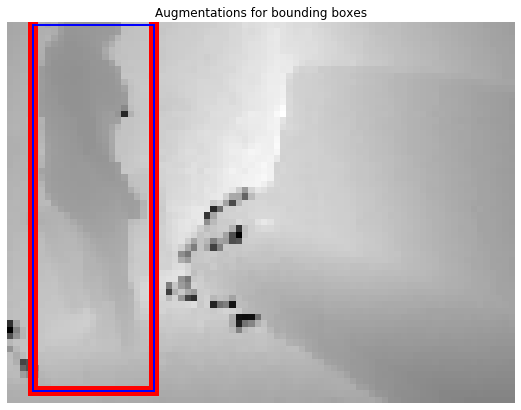

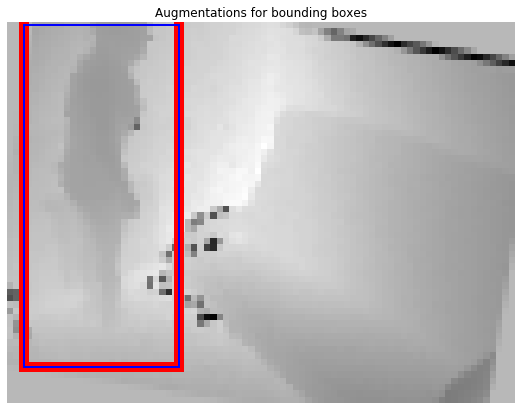

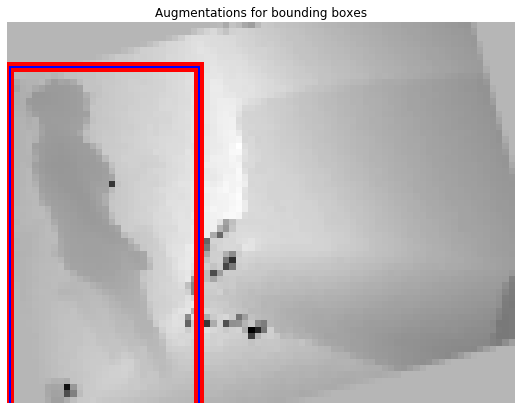

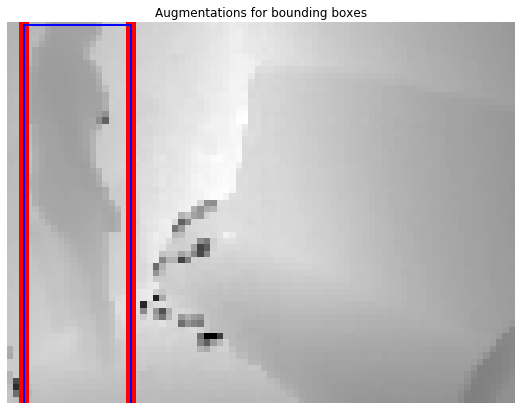

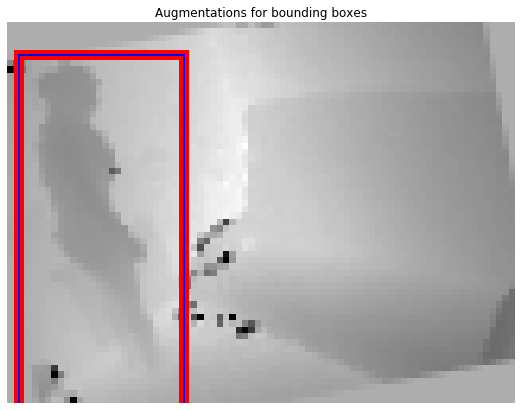

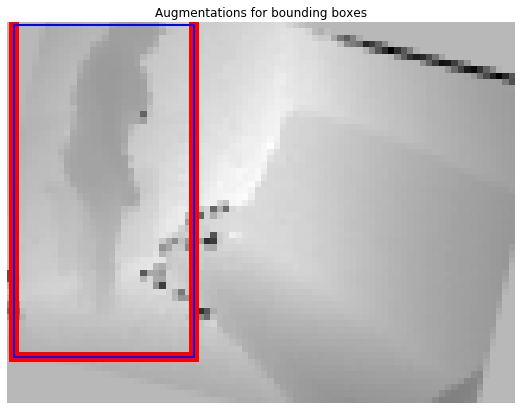

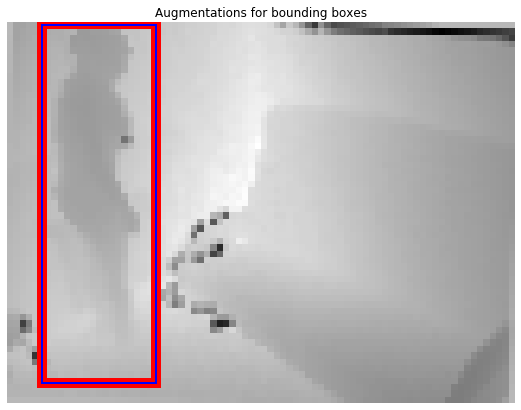

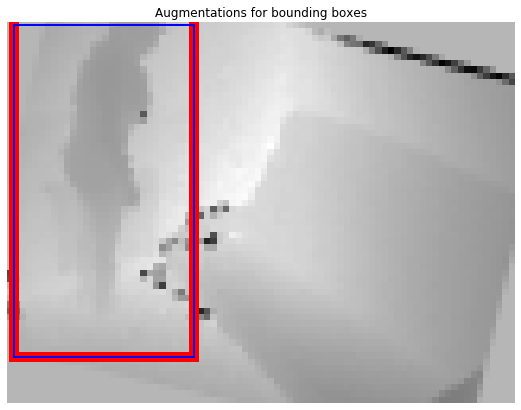

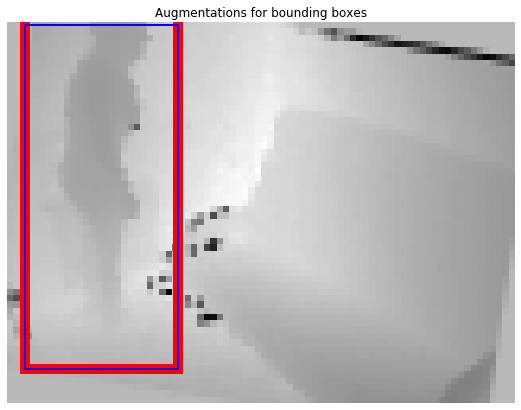

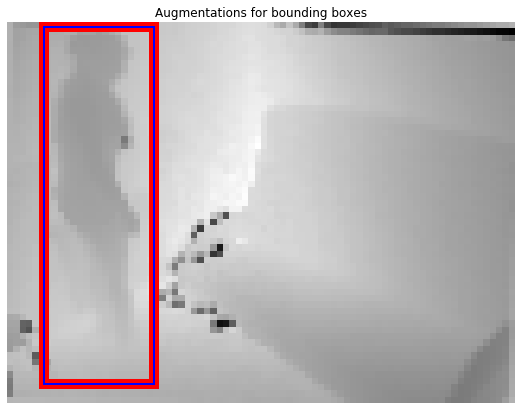

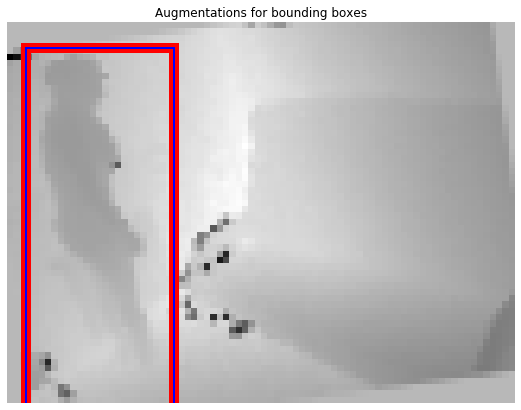

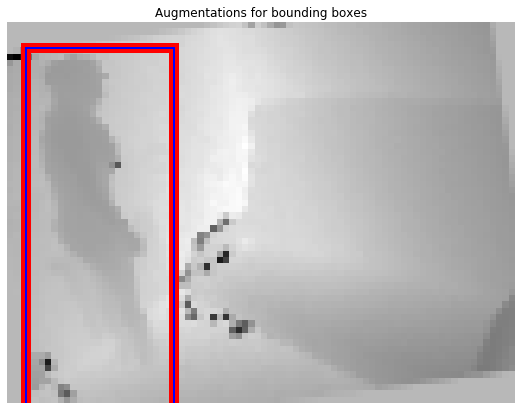

In [88]:
augmenters = [
              iaa.Crop(percent=(0, 0.2)),
              iaa.Affine(rotate=(-25, 25))
             ]

for i in range(50):
    seq = iaa.OneOf(augmenters)
    print(seq)
    image_aug, bbs_aug = seq(image = depth_image, bounding_boxes=bbs)
    bbs_aug_clipped = bbs_aug.clip_out_of_image(image_aug)
    
    if bbs_aug_clipped.area/bbs_aug.area < 0.8:
        #Si on crop plus de 20% d'une bbox lors du clip_out_of_image(), on recommence.
        continue
           
    rect = patches.Rectangle((bbs_aug.x1,bbs_aug.y1), bbs_aug.x2-bbs_aug.x1, bbs_aug.y2-bbs_aug.y1,linewidth=10,edgecolor='r',facecolor='none')
    rect2 = patches.Rectangle((bbs_aug_clipped.x1,bbs_aug_clipped.y1), bbs_aug_clipped.x2-bbs_aug_clipped.x1, bbs_aug_clipped.y2-bbs_aug_clipped.y1,linewidth=2,edgecolor='b',facecolor='none')
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.axis('off')
    plt.title('Augmentations for bounding boxes')
    ax.imshow(image_aug, cmap='gray')
    ax.add_patch(rect)
    ax.add_patch(rect2)
    